In [3]:
import pandas as pd
import numpy as np
import nltk


In [4]:
df=pd.read_json('korpus_berita_update (Revisi).json')

In [5]:
df.head()

,id,content
0,0,PDI Perjuangan (PDIP) Surabaya melaporkan temu...
1,1,PT Telkom Indonesia bekerja sama dengan PDAM K...
2,2,Pengurus Besar Ikatan Dokter Indonesia (IDI) m...
3,3,Arkeolog Institut Antropologi dan Sejarah Nasi...
4,4,Maverick Vinales harus meraih kemenangan di Mo...


# A. Edit Distance

1. Buatlah sebuah fungsi yang bernama “edit_distance”. Fungsi tersebut menerima 2
parameter berupa string (string_1, string_2). Implementasikan algoritma Levenshtein
Distance pada fungsi tersebut. Fungsi tersebut nantinya akan mengembalikan nilai
terkecil yang dibutuhkan untuk mentransformasi string_1 menjadi string_2.

In [6]:
# src: https://www.datacamp.com/community/tutorials/fuzzy-string-python
def edit_distance(string_1,string_2):
    # Initialize matrix of zeros
    rows = len(string_1)+1
    cols = len(string_2)+1
    distance = np.zeros((rows,cols),dtype = int)
    
    # Initialize index of each char from both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k
    
     # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if string_1[row-1] == string_2[col-1]: #for given position [i,j] of the two strings, if the char is same then the cost is 0
                cost = 0 
            else: #else, find cost=1, then the [i+1,j+1] val is the min of [deletion, insertion, and subs] cost.
                cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
        
    print(f"edit distance between '{string_1}' and '{string_2}': {distance[row][col]}")

2. Menggunakan fungsi yang telah dibuat pada soal sebelumnya, carilah nilai
edit_distance dari pasangan kata berikut ini:
a. keberimbangan - keberanian
b. keberimbangan - keberangkatan

In [7]:
edit_distance("keberimbangan","keberanian")
edit_distance("keberimbangan","keberangkatan")

edit distance between 'keberimbangan' and 'keberanian': 4
edit distance between 'keberimbangan' and 'keberangkatan': 6


# B. Text Preprocessing

Pada bagian ini, teman-teman diminta untuk melakukan beberapa teknik preprocessing pada
korpus berita yang telah disediakan. Preprocessing yang dilakukan terdiri dari case folding,
stop words removal, stemming, dan lemmatization (dilakukan).
*catatan:
- Untuk mempermudah pengerjaan, teman-teman diperbolehkan menggunakan library
seperti nltk (stopwords), sastrawi (stemming), dan stanza (lemmatization), maupun
library lainnya.

## 1. Preprocessing
- Untuk setiap berita yang terdapat pada korpus, terapkan case folding. Case
folding mentransformasi semua karakter ke dalam format lowercase.
- Hilangkan karakter berupa angka, whitespace, dan tanda baca
(‘!@#$%^&*()-_+=?/>.<,|\~`’)

In [8]:
df['content'][0]

'PDI Perjuangan (PDIP) Surabaya melaporkan temuan stiker berisi hasutan dan provokasi bergambar Bakal Calon Wali Kota Eri Cahyadi dan Wakil Wali Kota Surabaya dua periode Wishnu Sakti Buana ke polisi dan Bawaslu. \nStiker itu dinilai memprovokasi sebab Whisnu Sakti Buana digambarkan sedang duduk di punggung banteng. Sementara, di sebelahnya ada, Eri Cahyadi, duduk di atas sofa. \nDalam stiker itu tertulis: Jare Mak\'e, gak perlu jadi wali kota. Tumpakno replika banteng wes seneng (kata Ibu, tidak perlu jadi wali kota. Naikkan ke replika banteng sudah senang).\nWhisnu Sakti Buana batal maju sebagai sebagai calon wali kota Surabaya. PDIP memutuskan mengusung Eri Cahyadi dan Armudji pada Pilwalkot Surabaya.\nStiker itu pertama kali ditemukan oleh Kongko Windani, Warga Petemon, Surabaya. Ia bersama Kepala Badan Bantuan Hukum dan Advokasi Rakyat (BBHAR) PDIP Surabaya Arif Budi Santoso, pun melaporkan hal itu ke Polrestabes Surabaya. \nArif menjelaskan, laporan ini bermula pada Jumat (17/9) 

In [9]:
df['content']= [ c.lower() for c in df.content]

In [10]:
df['content'][0]

'pdi perjuangan (pdip) surabaya melaporkan temuan stiker berisi hasutan dan provokasi bergambar bakal calon wali kota eri cahyadi dan wakil wali kota surabaya dua periode wishnu sakti buana ke polisi dan bawaslu. \nstiker itu dinilai memprovokasi sebab whisnu sakti buana digambarkan sedang duduk di punggung banteng. sementara, di sebelahnya ada, eri cahyadi, duduk di atas sofa. \ndalam stiker itu tertulis: jare mak\'e, gak perlu jadi wali kota. tumpakno replika banteng wes seneng (kata ibu, tidak perlu jadi wali kota. naikkan ke replika banteng sudah senang).\nwhisnu sakti buana batal maju sebagai sebagai calon wali kota surabaya. pdip memutuskan mengusung eri cahyadi dan armudji pada pilwalkot surabaya.\nstiker itu pertama kali ditemukan oleh kongko windani, warga petemon, surabaya. ia bersama kepala badan bantuan hukum dan advokasi rakyat (bbhar) pdip surabaya arif budi santoso, pun melaporkan hal itu ke polrestabes surabaya. \narif menjelaskan, laporan ini bermula pada jumat (17/9) 

In [11]:
remove_string='‘!@#$%^&*()-_+=?/>.<,|\~`:;\'’\n\t\r1234567890'
df['content']=[ ''.join([c for c in cont if c not in remove_string]) for cont in df.content]
print(df['content'][0])

pdi perjuangan pdip surabaya melaporkan temuan stiker berisi hasutan dan provokasi bergambar bakal calon wali kota eri cahyadi dan wakil wali kota surabaya dua periode wishnu sakti buana ke polisi dan bawaslu stiker itu dinilai memprovokasi sebab whisnu sakti buana digambarkan sedang duduk di punggung banteng sementara di sebelahnya ada eri cahyadi duduk di atas sofa dalam stiker itu tertulis jare make gak perlu jadi wali kota tumpakno replika banteng wes seneng kata ibu tidak perlu jadi wali kota naikkan ke replika banteng sudah senangwhisnu sakti buana batal maju sebagai sebagai calon wali kota surabaya pdip memutuskan mengusung eri cahyadi dan armudji pada pilwalkot surabayastiker itu pertama kali ditemukan oleh kongko windani warga petemon surabaya ia bersama kepala badan bantuan hukum dan advokasi rakyat bbhar pdip surabaya arif budi santoso pun melaporkan hal itu ke polrestabes surabaya arif menjelaskan laporan ini bermula pada jumat  dinihari sekitar pukul  wib di kawasan jalan 

## 2. Tokenisasi dan stopwords
- Lakukan tokenization pada masing-masing berita dan tampilkan list of token
(hasil tokenisasi) dari 5 berita pertama.
- Untuk masing-masing berita, temukan token yang tergolong stopwords lalu
hilangkan dari list of tokens.

In [12]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

df['tokenized']=[ word_tokenize(c) for c in df.content ]

In [13]:
df.head()

,id,content,tokenized
0,0,pdi perjuangan pdip surabaya melaporkan temuan...,"[pdi, perjuangan, pdip, surabaya, melaporkan, ..."
1,1,pt telkom indonesia bekerja sama dengan pdam k...,"[pt, telkom, indonesia, bekerja, sama, dengan,..."
2,2,pengurus besar ikatan dokter indonesia idi mem...,"[pengurus, besar, ikatan, dokter, indonesia, i..."
3,3,arkeolog institut antropologi dan sejarah nasi...,"[arkeolog, institut, antropologi, dan, sejarah..."
4,4,maverick vinales harus meraih kemenangan di mo...,"[maverick, vinales, harus, meraih, kemenangan,..."


In [14]:
# src: https://devtrik.com/python/text-preprocessing-dengan-python-nltk/
stopwords=set(stopwords.words('indonesian'))
len(stopwords)

757

In [15]:
df['tokenized_strapped'] = [[ word for word in tok if word not in stopwords ] for tok in df.tokenized ]

In [16]:
df['tokenized_strapped'].head()

0    [pdi, perjuangan, pdip, surabaya, melaporkan, ...
1    [pt, telkom, indonesia, pdam, kabupaten, bandu...
2    [pengurus, ikatan, dokter, indonesia, idi, okn...
3    [arkeolog, institut, antropologi, sejarah, nas...
4    [maverick, vinales, meraih, kemenangan, motogp...
Name: tokenized_strapped, dtype: object

## 3. Menggunakan hasil yang didapat dari soal 3, 
lakukan stemming untuk masing - masing token pada setiap list of tokens. Selanjutnya, tampilkan list of tokens dari 5
berita pertama.

In [17]:
# https://medium.com/@ksnugroho/dasar-text-preprocessing-dengan-python-a4fa52608ffe
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm

stemmer=StemmerFactory().create_stemmer()
df['tokenized_stemmed'] = [ word_tokenize(stemmer.stem(" ".join(cont))) for cont in tqdm(df.tokenized_strapped) ]

100%|██████████| 30/30 [03:25<00:00,  6.86s/it]


In [18]:
df['tokenized_stemmed'].head()

0    [pdi, juang, pdip, surabaya, lapor, temu, stik...
1    [pt, telkom, indonesia, pdam, kabupaten, bandu...
2    [urus, ikat, dokter, indonesia, idi, oknum, do...
3    [arkeolog, institut, antropologi, sejarah, nas...
4    [maverick, vinales, raih, menang, motogp, emil...
Name: tokenized_stemmed, dtype: object

## 4. Menggunakan hasil yang didapat dari soal 3, 
lakukan lemmatization untuk masing-masing token pada setiap list of tokens. Selanjutnya, tampilkan list of tokens dari 5 berita pertama.

In [19]:
import stanza
nlp = stanza.Pipeline('id')

2020-10-22 11:24:08 INFO: Loading these models for language: id (Indonesian):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |

2020-10-22 11:24:09 INFO: Use device: gpu
2020-10-22 11:24:09 INFO: Loading: tokenize
2020-10-22 11:24:17 INFO: Loading: pos
2020-10-22 11:24:21 INFO: Loading: lemma
2020-10-22 11:24:21 INFO: Loading: depparse
2020-10-22 11:24:25 INFO: Done loading processors!


In [20]:
temp=list()
for cont in tqdm(df.tokenized_strapped):
    doc=nlp(" ".join(cont))
    lemma = [ word.lemma for sent in doc.sentences for word in sent.words]
    temp.append(lemma)
# print(temp)

100%|██████████| 30/30 [00:33<00:00,  1.11s/it]


In [21]:
df['tokenized_lemmatized']=temp

In [22]:
df.head()

,id,content,tokenized,tokenized_strapped,tokenized_stemmed,tokenized_lemmatized
0,0,pdi perjuangan pdip surabaya melaporkan temuan...,"[pdi, perjuangan, pdip, surabaya, melaporkan, ...","[pdi, perjuangan, pdip, surabaya, melaporkan, ...","[pdi, juang, pdip, surabaya, lapor, temu, stik...","[pdi, perjuangan, pdip, surabaya, menlaporkan,..."
1,1,pt telkom indonesia bekerja sama dengan pdam k...,"[pt, telkom, indonesia, bekerja, sama, dengan,...","[pt, telkom, indonesia, pdam, kabupaten, bandu...","[pt, telkom, indonesia, pdam, kabupaten, bandu...","[pt, telkom, indonesia, pdam, kabupaten, bandu..."
2,2,pengurus besar ikatan dokter indonesia idi mem...,"[pengurus, besar, ikatan, dokter, indonesia, i...","[pengurus, ikatan, dokter, indonesia, idi, okn...","[urus, ikat, dokter, indonesia, idi, oknum, do...","[penkurus, ikatan, dokter, indonesia, idi, okn..."
3,3,arkeolog institut antropologi dan sejarah nasi...,"[arkeolog, institut, antropologi, dan, sejarah...","[arkeolog, institut, antropologi, sejarah, nas...","[arkeolog, institut, antropologi, sejarah, nas...","[arkeolog, institut, antropologi, sejarah, nas..."
4,4,maverick vinales harus meraih kemenangan di mo...,"[maverick, vinales, harus, meraih, kemenangan,...","[maverick, vinales, meraih, kemenangan, motogp...","[maverick, vinales, raih, menang, motogp, emil...","[maverick, vinales, menraih, kemenangan, motog..."


# C. Word Vector 

## C1. TF-IDF

1. Carilah representasi tf-idf dari setiap berita. Gunakan list of tokens yang sudah
dilematisasi pada soal sebelumnya. Setelah itu hitunglah L norm dari 2
masing-masing berita. Dokumen dengan “id” berapakah yang memiliki L2 norm
paling besar ? Berapa nilai L norm dari berita tersebut ? 

In [23]:
# compute times each token occurence on the document (TF)
word_freq=dict()
word_unique=set()
for id_doc, doc in df.iterrows():
    for tok in doc.tokenized_lemmatized:
        word_unique.add(tok)
        if (tok,id_doc) not in word_freq:
            word_freq[tok,id_doc]=1
        else:
            word_freq[tok,id_doc]+=1
len_word= sum(word_freq.values())
        

In [24]:
len(word_unique)

2327

In [25]:
'domba' in word_unique

True

In [26]:
# generate idf
idf_dict=dict()
N=len(df['tokenized_lemmatized']) # length of all documents
idf_dict = dict.fromkeys(word_unique, 0) # init dict with the unique tokens
for tok in idf_dict.keys():
    count=0
    for doc in df.tokenized_lemmatized: 
        if tok in doc: #count all documents that contains tok
            count+=1
    idf_dict[tok] = np.log(N / (float(count))) #idf[token]=log(N / num of docs that containt token)

In [27]:
tfidf_dict=dict()
tfidf_dict = dict.fromkeys(word_freq, 0)
for i,id_doc in word_freq.keys():
        tfidf_dict[i, id_doc]=word_freq[i, id_doc] * idf_dict[i] # tf-idf[t,d]= tf[t,d] * idf[t]

In [28]:
# init tf idf store dict
store_dict= dict()
for i in range(len(df)): 
    store_dict[i] = list()

# assign dict with each tf idf values
for i,id_doc in tfidf_dict.keys():
    store_dict[id_doc].append(tfidf_dict[i,id_doc])

In [29]:
norm_list={ i:np.linalg.norm(store_dict[i]) for i in store_dict }
id_max_norm=max(norm_list,key=norm_list.get)
print(f"dokumen dengan id {id_max_norm} lah yang memiliki L2 norm terbesar, dengan nilai norm sebesar {norm_list[id_max_norm]} ")

dokumen dengan id 8 lah yang memiliki L2 norm terbesar, dengan nilai norm sebesar 98.22947846439811 


## C2. Word2Vec

1. Menggunakan list of tokens yang sudah dilematisasi, Buatlah sebuah model
word2vec dengan menggunakan library yang disediakan oleh gensim dengan
ketentuan sebagai berikut:
- ukuran dimensi word2vec yang dihasilkan adalah 2
- Teman-teman dibebaskan untuk menggunakan model skip-gram ataupun
CBOW.1
- pilih jumlah iterasi / epoch sebesar 10.
- untuk parameter lainnya, teman-teman dibebaskan untuk memilih nilainya
sendiri.

In [30]:
from gensim.models import Word2Vec

In [31]:
w2v_model= Word2Vec(window=5, size=2, workers=4, min_count=2, sg=1) #skipgram word2vec
try:
    w2v_model.build_vocab(df.tokenized_lemmatized)
    w2v_model.train(df.tokenized_lemmatized, total_examples= w2v_model.corpus_count, epochs= 10)
except:
    print('error')

In [32]:
print(w2v_model.wv['surabaya'])

[-1.4282769  0.3649966]


2. Simpan model yang word2vec yang sudah dilatih dengan nama file
“word2vec.model”. Kumpulkan model yang sudah dilatih

In [33]:
w2v_model.save('word2vec.model')

3. Gunakan model yang sudah disimpan pada soal 2 untuk mencari representasi
word2vec dari term berikut ini:
- air
- domba

In [34]:
w2v_load_model=Word2Vec.load('word2vec.model')

In [35]:
w2v_load_model['air']

array([-1.1612899 ,  0.69073397], dtype=float32)

In [36]:
w2v_load_model['domba']

array([-0.8259374,  0.6456925], dtype=float32)

4. Plot nilai vektor dari kedua term yang teman-teman dapatkan (soal nomor 3) dalam
format 2D-euclidean space. (Teman-teman tidak perlu melakukan reduksi dimensi
mengingat dimensionalitas dari model word2vec sudah bernilai 2). Gambar berikut
ini merupakan contoh plotting yang diharapkan.
DISCLAIMER: Hasil plot yang didapat mungkin saja tidak sesuai dengan ekspektasi
teman - teman mengingat kecilnya nilai epoch yang digunakan dan korpus yang
digunakan untuk kebutuhan tugas ini.

In [37]:
c=0
w2v=dict()
for i in word_unique:
    c+=1
    try:
        w2v[i]= w2v_model.wv[i]
    except:
        continue
print(c)

2327


In [38]:
import matplotlib.pyplot as plt

In [39]:
x= [ i[0] for i in w2v.values()]
y= [ i[1] for i in w2v.values()]


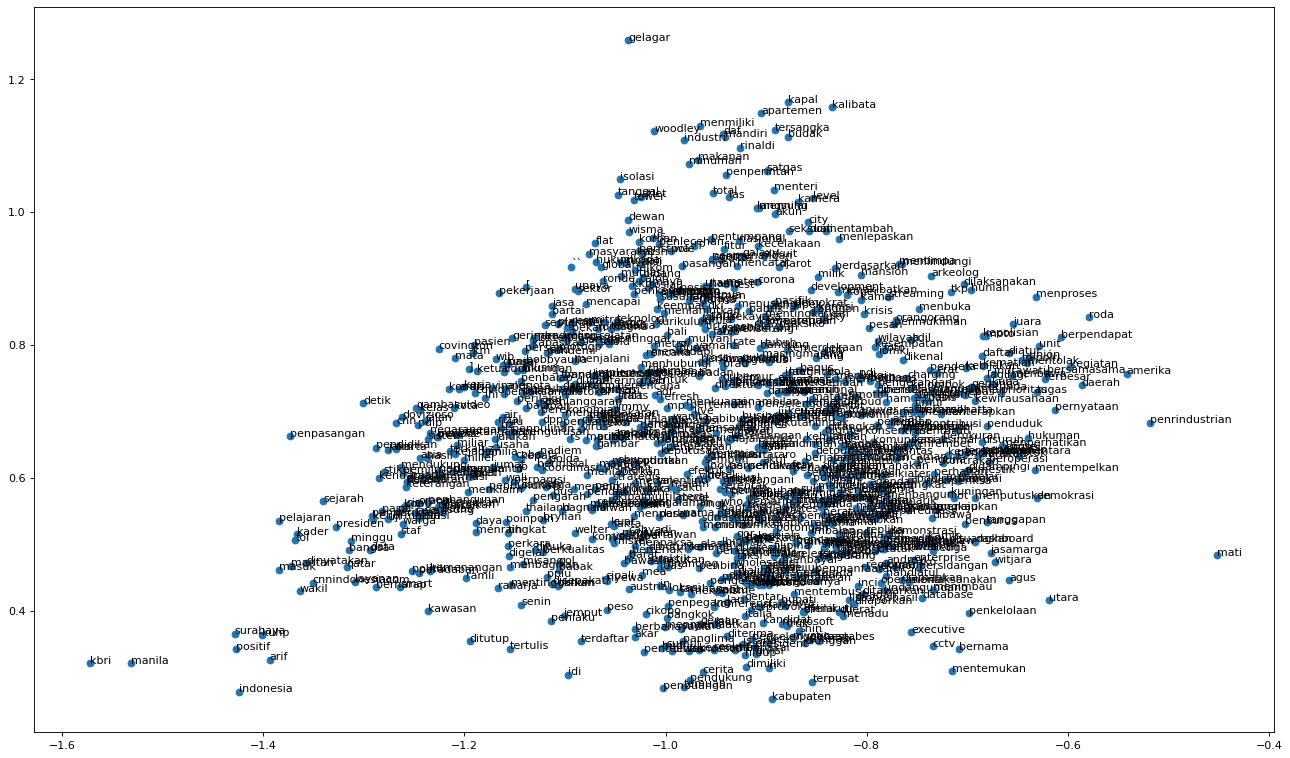

In [40]:
fig, ax = plt.subplots(figsize=(20,12),dpi=80, facecolor='w', edgecolor='k')
ax.scatter(x,y)

for txt in w2v.keys():
    ax.annotate(txt, w2v[txt])

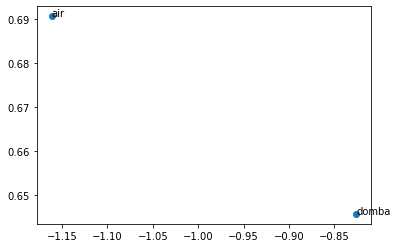

In [41]:
fig, ax = plt.subplots()
x1=[w2v_load_model['air'][0],w2v_load_model['domba'][0]]
y1=[w2v_load_model['air'][1],w2v_load_model['domba'][1]]
ax.scatter(x1,y1)

dict_3 = {
    'air': w2v_load_model['air'],
    'domba': w2v_load_model['domba']
    }

for txt in dict_3:
    ax.annotate(txt, dict_3[txt])

5. BONUS: Teman-teman dapat menggunakan pretrained model word2vec yang sudah
dilatih menggunakan korpus wikipedia bahasa Indonesia. Setelah berhasil me-load
model tersebut, teman-teman dapat mencoba menggunakan model tersebut untuk
melakukan plotting terhadap kedua term pada soal 3. Coba ceritakan perbedaan apa
yang teman-teman dapatkan?
- https://drive.google.com/drive/u/0/folders/1Sz_8Derx4DjoelgVxCLpOGr8Uv
pUEqJ7 → pretrained model word2vec menggunakan korpus wikipedia
Bahasa Indonesia. Terdapat 3 model pretrained word2vec dengan
dimensionalitas embedding yang berbeda (100, 200, 300). Teman-teman
cukup menggunakan model pretrained dengan dimensionalitas 100 (242 MB
dalam format .zip).
- https://github.com/deryrahman/word2vec-bahasa-indonesia → Cara
menggunakan pretrained model (credit to @deryrahman)

*catatan:
- Teman-teman dapat menggunakan link di bawah ini untuk lebih memahami
word2vec:
1. https://ir.cs.ui.ac.id/alfan/tutorial/gensim_w2v.html
2. https://radimrehurek.com/gensim/models/word2vec.html
3. https://radimrehurek.com/gensim/models/word2vec.html
4. https://towardsdatascience.com/nlp-101-word2vec-skip-gram-and-cbow-93512ee24314#:~:text=In%20the%20CBOW%20model%2C%20the,used%20to%20predict%20the%20context%20.
- Untuk keperluan plotting, teman-teman dapat menggunakan library matplotlib
ataupun library yang lain.


In [42]:
w2v_load_model_pretrained=Word2Vec.load('idwiki_word2vec_100.model')

In [43]:
w2v_load_model_pretrained['air']

array([ 1.1182116 ,  2.0618398 ,  4.6943107 , -3.0221236 , -3.0409517 ,
       -1.3017954 , -0.1518118 ,  0.13858771, -5.1806192 , -3.3212721 ,
       -2.6593297 , -2.820464  , -0.19154048,  1.2529339 ,  0.04585536,
       -0.4204929 , -2.4444304 , -0.24363165, -2.1219554 ,  0.7750365 ,
       -1.9082646 , -1.6997186 , -2.6488647 ,  0.6190252 ,  1.1875762 ,
        0.39339882,  0.73452526,  3.898938  ,  0.62330574, -0.2374445 ,
       -2.7022698 ,  2.8772182 ,  1.1284477 ,  2.6250114 ,  0.9985549 ,
        0.3989209 ,  0.41675785,  0.9942736 , -0.8722747 ,  1.537012  ,
        0.18052767,  1.4157465 ,  0.7150478 ,  1.394026  , -0.74916154,
       -3.2102213 ,  4.7712984 , -1.8034359 , -1.2651821 , -2.870329  ,
       -0.68456715,  0.77286124,  4.3746524 ,  0.76799995, -0.753567  ,
        0.6433416 , -2.209096  ,  1.0424085 ,  1.6567421 , -1.9987116 ,
       -2.388335  ,  0.44237438, -2.4156995 ,  0.6119867 ,  1.5766355 ,
       -2.2951465 , -1.1237025 ,  1.1305083 ,  5.244729  , -1.69

In [44]:
w2v_load_model_pretrained['domba']

array([ 2.22337   , -0.36917886,  0.4716327 , -1.1402574 , -3.9647794 ,
        1.3038161 ,  0.80950254, -3.2433383 , -2.9988983 ,  0.8618665 ,
       -3.267056  ,  2.2056825 , -0.53179836,  2.0397656 , -0.27176413,
        3.408264  , -0.3970109 , -3.834215  , -1.3320644 , -2.5919132 ,
       -1.6158472 , -0.04786647,  3.3780015 ,  0.10333667,  3.5604894 ,
       -0.20042217,  0.13140877,  1.9969773 , -1.3977247 , -0.24473214,
        0.38605037, -1.3646771 ,  0.00714694, -2.4804082 , -2.541175  ,
       -1.4293934 ,  0.38274443, -1.7627832 , -2.0588179 ,  1.063292  ,
        2.1985207 ,  2.036232  ,  2.2626526 , -2.823269  , -0.98780257,
        1.0496991 , -1.0551925 , -0.61966944, -0.15995316, -3.4471111 ,
        0.03249837,  0.15301219,  1.3091515 ,  1.6146563 ,  0.15599072,
       -0.6897202 ,  1.6161338 ,  1.780897  , -2.802248  , -1.1113327 ,
        0.3865008 , -1.8121864 ,  0.22749776,  2.9152348 ,  0.6370363 ,
       -0.9568254 ,  0.24449484, -0.17064795,  0.9897916 ,  1.87

perbedaan nya adalah jumlah dimensi dan akurasi nya, karena jumlah dimensi pada pretrained model yg saya gunakan adalah 100, dibanding sebelumnya adalah 2. kemudian, dataset yang digunakan pada model pretrained tersebut jauh lebih banyak dibanding model yg dibuat. karena 2 faktor tersebut (dan mungkin faktor-faktor lainnya) sehingga model pretrained memiliki performa jauh lebih bagus daripada model yang dibuat. 

## C3. GloVe

*catatan:
- Teman-teman dapat menggunakan literatur berikut untuk lebih memahami
GloVe:
1. https://towardsdatascience.com/light-on-math-ml-intuitive-guide-to-understanding-glove-embeddings-b13b4f19c010
2. https://nlp.stanford.edu/projects/glove/

1. Apa perbedaan antara metode word2vec dan GloVe ?

word2vec hanya melihat local statistics (kata2 disekitar token t) pada saat train , namun Glove juga melihat global statistics untuk mendapatkan wv (dengan word co-occurence pada 1 corpus).

2. Misalkan diberikan 2 korpus:
korpus 1 : “Saya mengerjakan tugas perolehan informasi”
korpus 2 : “Saya mengambil kuliah perolehan informasi”
Bentuk lah matriks co-occurence berdasarkan 2 korpus tersebut, dengan ketentuan
sebagai berikut:
- Gunakan setiap term yang ada pada korpus. Teman-teman tidak perlu
melakukan preprocessing seperti word removal, stemming, lemmatization, dll.
- Gunakan satu term di sebelah kanan dan satu term di sebelah kiri sebagai
konteks kemunculannya untuk setiap term yang akan dicari nilai
co-occurencenya. Sebagai contoh, misalkan terdapat korpus “informasi
perolehan informasi”, maka nilai co-occurence term “perolehan”-“informasi”
bernilai 2 (satu term setelah dan satu term sebelum term “perolehan” adalah
“informasi”), begitu pula dengan co-occurence “informasi”-”perolehan”
karena bersifat simetris.

In [176]:
korpus1_="Saya mengerjakan tugas perolehan informasi"
korpus2_="Saya mengambil kuliah perolehan informasi"

In [177]:
korpus1=set(word_tokenize(korpus1_))
korpus2=set(word_tokenize(korpus2_))


In [180]:
input_korpus=list(korpus1.union(korpus2))
input_korpus

['informasi',
 'kuliah',
 'perolehan',
 'mengerjakan',
 'tugas',
 'mengambil',
 'Saya']

In [183]:
df=pd.DataFrame(np.zeros((len(input_korpus),(len(input_korpus)))),
 index=input_korpus, columns=input_korpus)

In [184]:
for korpus in [korpus1_, korpus2_]:
    mat=word_tokenize(korpus)
    for i,tok in enumerate(mat):
        try:
            df[tok][mat[i+1]]+=1
            df[mat[i+1]][tok]+=1
        except:
            pass


In [185]:
df

,informasi,kuliah,perolehan,mengerjakan,tugas,mengambil,Saya
informasi,0.0,0.0,2.0,0.0,0.0,0.0,0.0
kuliah,0.0,0.0,1.0,0.0,0.0,1.0,0.0
perolehan,2.0,1.0,0.0,0.0,1.0,0.0,0.0
mengerjakan,0.0,0.0,0.0,0.0,1.0,0.0,1.0
tugas,0.0,0.0,1.0,1.0,0.0,0.0,0.0
mengambil,0.0,1.0,0.0,0.0,0.0,0.0,1.0
Saya,0.0,0.0,0.0,1.0,0.0,1.0,0.0


3. Berdasarkan matriks co-occurence yang sudah dibuat pada soal nomor 2, carilah nilai
P−(i, j)= X−(i, j)/X−i untuk masing-masing nilai i dan j di bawah ini:
- i = “informasi” dan j = “perolehan”
- i = “tugas” dan j = “perolehan”,

dengan ketentuan:
- X : Korpus
- P −(i, j) : probabilitas kemunculan term-i dan term-j secara bersamaan
- X −(i, j) : Jumlah kemunculan term-i dan term-j secara bersamaan pada korpus X
- X−(i): Jumlah total kemunculan term-i pada korpus X

In [186]:
tf=dict()
for korpus in [korpus1_, korpus2_]:
    mat=word_tokenize(korpus)
    for i in mat:
        if i not in tf:
            tf[i]=1
        else:
            tf[i]+=1
print(tf)

{'Saya': 2, 'mengerjakan': 1, 'tugas': 1, 'perolehan': 2, 'informasi': 2, 'mengambil': 1, 'kuliah': 1}


In [188]:
# - i = “informasi” dan j = “perolehan”
P_3a= co_pd['informasi']['perolehan']/tf['informasi']
print(P_3a)
# - i = “tugas” dan j = “perolehan”
P_3b= co_pd['tugas']['perolehan']/tf['tugas']
print(P_3b)

1.0
1.0


4. Carilah nilai P−(tugas, perolehan)/ P−(informasi, perolehan). Berdasarkan nilai tersebut, apa yang teman - teman dapat simpulkan mengenai relevansi antara term-term “informasi-perolehan” dan “tugas-perolehan” ?

In [189]:
P_3b/P_3a

1.0

because the score is 1, it means "informasi" and "tugas" is either related or unrelated 